# Machine Learning Project

## Summary

For this project, I utilized machine learning techniques to generate business value from a data set of hotel bookings. I used supervised learning algorithms to solve the regression problem of predicting the cost of a hotel booking and the classification problem of predicting whether or not a hotel booking will be canceled. I also used the unsupervised learning technique of clustering to perform customer segmentation.

A complete description of the project can be found below. The hotel bookings data set can be accessed in the [project's GitHub repository](https://github.com/ZanwarFaraj/machine-learning).

## Motivation

My motivation for this project was to practice using the skills and tools listed below. In particular, I wanted to clearly document the entire machine learning workflow and apply that workflow to solve a variety of business problems.

## Skills and Tools Used

### Skills

- Machine learning
    - Regression
    - Classification
    - Clustering
- Exploratory data analysis
- Data cleaning
- Data visualization
- Project documentation

### Tools

- Python
    - scikit-learn
    - pandas
    - Matplotlib
    - NumPy
- Jupyter Notebook

## Data Collection

### Problem Specification

I started by determining the types of machine learning problems to focus on for this project. These problem types are listed below.

- Supervised learning
    - Regression
    - Classification
- Unsupervised learning
    - Clustering
    
There are numerous other types of machine learning problems but regression, classification, and clustering are perhaps the most common business use cases for machine learning. Thus, I wanted to focus on these three problem types to ensure that the machine learning techniques I utilize in this project are applicable to a wide variety of practical business problems.

### Data Requirements Specification

I then specified the requirements for the data set I would work with in this project. These requirements are listed below.

*The data set must:*

- contain data relevant to the operations of a business
- contain at least 10,000 observations (this is an arbitrary benchmark that approximates the data set size needed to solve a non-trivial machine learning problem)
- contain both continuous, numerical attributes and discrete, categorical attributes (so as to be relevant for both regression and classification problems)
- contain observations that can be grouped in a meaningful and interpretable way (so as to be relevant for clustering problems)
- be relatively clean, easy to work with, and well-documented
- be free and publicly accessible
- be in a standard format (such as a CSV file)

### Data Set Selection

Next, I began looking for a data set that met my requirements. Eventually, I settled on a [data set](https://www.kaggle.com/jessemostipak/hotel-booking-demand) containing hotel booking information that was uploaded to Kaggle, an online community of data scientists, by user Jesse Mostipak. The data set was originally created and documented by Nuno Antonio, Ana Almeida, and Luis Nunes for the [article](https://www.sciencedirect.com/science/article/pii/S2352340918315191) "Hotel booking demand datasets" published in *Data in Brief* (Volume 22, February 2019).

## Exploratory Data Analysis

### Data Profile Report

I then created a data profile report to explore the contents of the hotel bookings data set.

In [27]:
# Import package used for data manipulation in Python
import pandas

# Import package used for exploratory data analysis
from pandas_profiling import ProfileReport

# Import the data set (as a CSV file) into a pandas DataFrame
raw_data = pandas.read_csv('hotel_bookings.csv', index_col = False)

# Create and display a report summarizing the data in the hotel bookings data set
profile = ProfileReport(raw_data, title='Hotel Bookings Data Profile Report', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

### Insights from Report

- The data set contains 119,390 observations representing distinct hotel bookings at one of two hotels in Portugal between 2015 and 2017. 
- One of the hotels is a resort hotel while the other is a city hotel. 
- 37% of the observations represent canceled bookings.
- The data set contains 32 attributes corresponding to various details associated with each booking. 
- Some of the attributes are continuous, numerical variables while others are discrete, categorical variables. 
- The data generally appears accurate and complete.  

## Data Cleaning

To facilitate further work with the data set, I examined the data profile report to determine if any data cleaning actions needed to be performed. In particular, I checked for the following common issues.

**Missing values**  
There are four attributes that contain missing values: "agent", "company", "children", and "country". 

According to the documentation for the data set, the "agent" attribute represents the hotel booking agent used to make the booking and the "company" attribute represents the company that paid for the booking. The documentation specifies that a null value for "agent" or "company" indicates that a booking agent or company was not associated with the booking. The non-null values for "agent" and "company" are numerical IDs rather than names to protect the privacy of the corresponding booking agents and companies. As no meaningful insight can be gained from these arbitrary IDs, the "agent" and "company" attributes are more useful for indicating whether or not a booking agent or company was involved with the booking, not in specifying exactly which booking agent or company was involved. Thus, I decided to transform these attributes into indicator variables by replacing all null values with 0 and all non-null values with 1. Now, observations with a value of 0 for "agent" or "company" did not involve an agent or company while observations with a value of 1 for "agent" or "company" did involve an agent or company.

The documentation also specifies that the "children" attribute represents the number of children included in the booking and the "country" attribute represents the country in which the booking originated. As both of these attributes contain a relatively insignificant number of missing values, are highly interpretable, and likely provide a great deal of insight into the bookings, I decided to include these attributes and simply delete the observations containing missing values for these attributes. As only 0.4% of the observations contain missing values for "children" or "country", the vast majority of the observations are still usable for training and testing machine learning models.

**Duplicate observations**  
The data profile report indicates that 26.8% of the observations are duplicates. While duplicate observations are often a cause for concern, in the context of this data set, the duplicate observations are reasonable and simply indicate that many of the bookings were placed on the same day with the same booking details. As the data set contains no personally identifiable information and most hotel bookings are similar in nature, it is not surprising that many of the bookings appear identical based solely on the attributes provided.

**Incorrect data**  
The only attribute that appears to contain incorrect values is the "adr" attribute, which represents the average daily rate, or average daily cost for the hotel room associated with the booking. While all values for "adr" should be positive, one of the observations has a negative value for "adr". Furthermore, while all other "adr" values are less than or equal to 510, there is a single observation with an "adr" value of 5400. As these two observations are likely erroneous and only represent a miniscule fraction of the data, I simply removed these observations from the data set.

**Irrelevant observations**  
The data set contains 1,959 observations that have an "adr" value of zero. These values of zero indicate that the corresponding hotel rooms were booked free of charge but there is no mention of free bookings in the data set documentation nor are there any attributes in the data set that would reveal why some bookings would have zero associated cost. Additionally, there are 415 observations with an "adr" value between zero and twenty, representing bookings that are unusually low-priced. Again, there is no explanation for these extremely low-priced bookings in the documentation or the data set attributes. Thus, I decided to eliminate observations with "adr" values greater than or equal to zero and less than twenty to focus on bookings with a reasonable price that can be explained by the attributes in the data set.

**Structural errors**  
There don't appear to be any typos or inconsistent class names in the data set.

**Incorrect units**  
Both of the hotels represented in the data set are located in Portugal, where the official currency is the Euro. Thus, the unit for the average daily rate attribute, "adr", is the Euro. To make the data more interpretable for an American audience, I converted the "adr" values from Euros to USDs.  

**Summary of data cleaning actions**  
The data cleaning actions detailed above are summarized in the list below.

- Missing values:
    1. Transform the "agent" and "company" attributes into indicator variables by replacing all null values with 0 and all non-null values with 1
    2. Drop observations containing missing values for the "children" and/or "country" attributes
- Incorrect data:
    3. Drop the two observations containing the values -6.38 and 5400 for the "adr" attribute
- Irrelevant observations:
    4. Drop observations with 0 <= "adr" < 20
- Incorrect units:
    5. Convert the "adr" values from Euros to USDs
    
These actions are performed in the code cell below.

In [210]:
# 1) Transform the "agent" and "company" attributes into indicator variables by replacing all null values with 0 and
# all non-null values with 1
raw_data['agent'] = raw_data['agent'].notnull().astype('int')
raw_data['company'] = raw_data['company'].notnull().astype('int')

# 2) Drop observations containing missing values for the "children" and/or "country" attributes
raw_data.dropna(axis = 'index', how = 'any', inplace = True)

# 3) Drop the two observations containing the values -6.38 and 5400 for the "adr" attribute
raw_data = raw_data[(raw_data['adr'] != -6.38) & (raw_data['adr'] != 5400)]

# 4) Drop observations with 0 <= "adr" < 20
raw_data = raw_data[raw_data['adr'] >= 20]

# 5) Convert the "adr" values from Euros to USDs
raw_data['adr'] = raw_data['adr'] * 1.10

clean_data = raw_data

## Regression Problem

### Feature Engineering

Having cleaned the data set, I then began the process of feature engineering to solve the first machine learning problem addressed in this project: regression to predict a numeric feature.

*For clarity, attributes refer to variables (columns) in the data set while features refer to attributes that are used to train a model.*

**Selecting the target feature**  
First, I determined the target feature for the regression problem, i.e., the numeric feature that will be predicted. The most suitable feature for regression in the data set is the "adr" feature. Again, "adr" represents the average daily rate, or average daily cost for the hotel room associated with the booking. Thus, solving this regression problem allows us to predict how much a hotel room might cost based on its booking details, such as the arrival date and the room type. The prediction of hotel prices is a lucrative use case for machine learning and is key to the operation of hotel booking apps such as Hopper and Waylo. When a user attempts to book a hotel with one of these apps, they can see if the price of the hotel booking is expected to increase or decrease in the future, leading them to either book now or wait for a price decrease.

**Removing irrelevant attributes**  
The data set contains several attributes that are irrelevant to the task of predicting the average daily rate for a hotel booking. In particular, these attributes correspond to booking details that cannot be known at the time a booking is placed by a customer. These attributes can only be known after the initial booking, such as when the customer arrives at the hotel. The irrelevant attributes for this regression problem are "assigned_room_type", "booking_changes", "is_canceled", "reservation_status", and "reservation_status_date". These irrelevant attributes were dropped from the data set.

**Feature representation**  
Most machine learning algorithms can only work with numeric data so it was necessary to encode the categorical features into numeric features. As all of the categorical features in the data set are nominal, i.e., their classes have no meaningful order, I used one-hot encoding to convert the categorical features into indicator variables, also known as dummy variables. One-hot encoding creates a new dummy variable for each class in a categorical feature, where a value of 1 for a dummy variable indicates the presence of the class and a value of 0 indicates the absence of the class. 

One limitation of this technique is that if a feature has a high cardinality, or a large number of distinct classes, many new columns will have to be added to the data set. This can greatly increase the size of the data set and the computational cost of training a model. As the "country" feature has a high cardinality with 177 distinct values, I decided to group all countries with less than 1,000 associated observations into a single "Other" class. This greatly reduced the number of classes in the "country" feature and allowed me to proceed with one-hot encoding.

**Summary of feature engineering actions**  
- Removing irrelevant attributes:
    1. Drop "assigned_room_type", "booking_changes", "is_canceled", "reservation_status", and "reservation_status_date"
- Feature representation:
    2. For the "country" feature, group all countries with less than 1,000 observations into a single "Other" class
    3. One-hot encode all categorical features

In [272]:
# Create a copy of the cleaned data set to use specifically for this regression problem
clean_data_reg = clean_data.copy()

# 1) Drop "assigned_room_type", "booking_changes", "is_canceled", "reservation_status", and "reservation_status_date"
clean_data_reg.drop(['assigned_room_type', 'booking_changes', 'is_canceled', 'reservation_status', 
                     'reservation_status_date'], axis = 1, inplace = True)

# 2) For the "country" attribute, group all countries with less than 1,000 observations into a single "Other" class
grouped_countries = clean_data_reg.groupby('country')
minority_countries = []

for country, group in grouped_countries:
    if len(group) < 1000:
        minority_countries.append(country)
        
clean_data_reg['country'].replace(minority_countries, "Other", inplace = True)

# 3) One-hot encode all categorical features
cat_features = clean_data_reg.select_dtypes('object').columns
clean_data_reg = pandas.concat([clean_data_reg.drop(cat_features, axis = 1), 
                                pandas.get_dummies(clean_data_reg[cat_features])], axis = 1)

### Algorithm Selection

I decided to train and evaluate both a linear and a non-linear regression model. While linear models are preferable as they are more interpretable and less computationally expensive, they are unable to model some of the more complex relationships that non-linear models can handle. If the performance of a linear model and a non-linear model are comparable, I would use and optimize the linear model because of its simplicity. However, if the performance of the linear model was considerably worse than that of the non-linear model, I would use and optimize the non-linear model despite its complexity.

I selected Elastic-Net as the linear regression model for this problem. Elastic-Net is a compromise between Lasso Regression and Ridge Regression that has built-in feature selection and intuitive handling of collinear features. Through the appropriate selection of hyperparameters, Elastic-Net reverts to either Lasso Regression or Ridge Regression, which gives Elastic-Net a great deal of flexibility as a linear regression model.

I selected the random forest as the non-linear regression model. A random forest is an ensemble model that consists of many decision trees that have been combined via bagging. Random forests generally exhibit strong out-of-the-box performance, don't require extensive hyperparameter tuning, and work well on a wide variety of data sets.

### Model Training

#### Train/Test Split

First, I split the data set to reserve 80% of the observations for model training and cross validation and 20% of the observations for model testing. Because the models are only trained on 80% of the observations, the remaining observations can be used to test the performance of the models on unseen data.

In [273]:
# Import the scikit-learn function used to split the data set
from sklearn.model_selection import train_test_split

# Designate the target feature as "y" and the explanatory features as "x"
y = clean_data_reg['adr']
x = clean_data_reg.drop('adr', axis=1)

# Create the train and test sets for x and y and specify a random_state seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 87)

#### Cross-Validation

Next, I performed GridSearch cross-validation to cross-validate the models and tune the hyperparameters. The general process for GridSearch cross-validation is outlined below.

- For every model family (Elastic-Net & random forest):
    - For every combination of hyperparameters:
        - Perform k-fold cross validation
            - For each iteration:
                - Pre-process the folds
                    - Standardize the features (z-score standardization)
                - Fit the model on the training folds
                - Test the model on the testing fold
                - Calculate the cross-validated score for this iteration
            - Calculate the mean cross-validated score for this combination of hyperparameters
    - Retrain the model on the entire training set using the best combination of hyperparameters (as determined by the best mean cross-validated score)
    
The metrics used to evaluate the performance of the models on the cross-validation set are R^2, also known as the coefficient of determination, and negative mean squared error, also known as NMSE. NMSE was used instead of MSE because for both R^2 and NMSE, larger positive values indicate better model performance. These metrics are widely used to assess the predictive power of regression models and when considered together, they serve as a robust indicator of the quality of the models.  
   
GridSearch cross-validation for the Elastic-Net model is performed below.

In [277]:
# Import the scikit-learn functions and classes necessary to perform cross-validation
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

# Import the functions used to save and load a trained model
from joblib import dump, load

# Import the scikit-learn class used to train an Elastic-Net model
from sklearn.linear_model import ElasticNet

# Create a pipeline specifying all of the operations to perform when training the model
# In this case, the pipepline consists of z-score standardization and fitting of an Elastic-Net model
pipeline_en = make_pipeline(preprocessing.StandardScaler(), ElasticNet(fit_intercept = True))

# Specify the hyperparameters and their corresponding values that are to be used in GridSearch
hyperparameters_en = { 'elasticnet__alpha' : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
                  'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]}

# Initialize the GridSearch cross-validation object, specifying 10 folds for 10-fold cross-validation and
# "r2" and "neg_mean_squared_error" as the evaluation metrics for cross-validation scoring
elastic_net = GridSearchCV(pipeline_en, hyperparameters_en, cv = 10, scoring = ['r2', 'neg_mean_squared_error'], 
                            refit = 'r2', verbose = 0, n_jobs = -1)

# Train and cross-validate the random forest regression model and ignore the function output
_ = elastic_net.fit(x_train, y_train)

# Save the model so it can be used again without retraining it
_ = dump(elastic_net, 'saved_models/elastic_net.joblib')

GridSearch cross-validation for the random forest regression model is performed below.

In [300]:
# Import the scikit-learn class used to train a random forest regression model
from sklearn.ensemble import RandomForestRegressor

# Create a pipeline specifying all of the operations to perform when training the model
# In this case, the pipepline consists of z-score standardization and fitting of a random forest regressor
pipeline_rf = make_pipeline(preprocessing.StandardScaler(), 
                            RandomForestRegressor(n_estimators=100, random_state = 87))

# Specify the hyperparameters and their corresponding values that are to be used in GridSearch
hyperparameters_rf = {'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'], 
                      'randomforestregressor__max_depth': [None, 5]}

# Initialize the GridSearch cross-validation object, specifying 10 folds for 10-fold cross-validation and
# "r2" and "neg_mean_squared_error" as the evaluation metrics for cross-validation scoring
random_forest = GridSearchCV(pipeline_rf, hyperparameters_rf, cv = 10, scoring = ['r2', 'neg_mean_squared_error'], 
                            refit = 'r2', verbose = 0, n_jobs = -1)

# Train and cross-validate the random forest regression model and ignore the function output
_ = random_forest.fit(x_train, y_train)

# Save the model so it can be used again without retraining it
_ = dump(random_forest, 'saved_models/random_forest.joblib')

### Model Evaluation

#### Performance on Train and Test Sets

Having trained and cross-validated the models, I then used the models to make predictions on the test set. I evaluated the performance of the models on the test set using the same R^2 and NMSE metrics used to evaluate the models during cross-validation. The performance of the models as indicated by these metrics is displayed below.

In [301]:
# Import the scikit-learn functions used to calculate the R^2 and NMSE on the test set
from sklearn.metrics import r2_score, mean_squared_error

# Use the best Elastic-Net model to make predictions on the test set
y_test_pred_en = elastic_net.predict(x_test)

# Display the R^2 and NMSE on the train and test sets for the Elastic-Net model
print('Elastic-Net R^2 (train):', 
      round(elastic_net.cv_results_['mean_test_r2'][elastic_net.best_index_], 3))
print('Elastic-Net R^2 (test):', round(r2_score(y_test, y_test_pred_en), 3), '\n')
print('Elastic-Net NMSE (train):', 
      round(elastic_net.cv_results_['mean_test_neg_mean_squared_error'][elastic_net.best_index_], 3))
print('Elastic-Net NMSE (test):', 
      round(mean_squared_error(y_test, y_test_pred_en) * -1, 3), '\n')

# Use the best random forest model to make predictions on the test set
y_test_pred_rf = random_forest.predict(x_test)

# Display the R^2 and NMSE on the train and test sets for the random forest model
print('Random forest R^2 (train):', 
      round(random_forest.cv_results_['mean_test_r2'][random_forest.best_index_], 3))
print('Random forest R^2 (test):', round(r2_score(y_test, y_test_pred_rf), 3), '\n')
print('Random forest NMSE (train):', 
      round(random_forest.cv_results_['mean_test_neg_mean_squared_error'][random_forest.best_index_], 3))
print('Random forest NMSE (test):', 
      round(mean_squared_error(y_test, y_test_pred_rf) * -1, 3))

Elastic-Net R^2 (train): 0.63
Elastic-Net R^2 (test): 0.626 

Elastic-Net NMSE (train): -964.378
Elastic-Net NMSE (test): -970.466 

Random forest R^2 (train): 0.914
Random forest R^2 (test): 0.914 

Random forest NMSE (train): -224.625
Random forest NMSE (test): -223.808


#### Evaluating Bias vs Variance

To further evaluate the quality of the models, I determined the degree of bias and variance exhibited by the models. A model with low bias and high variance will perform well on the training set but perform poorly on the test set, a model with high bias and low variance will perform poorly on both the training and test sets, and a model with low bias and low variance will perform well on both the training and test sets. It is desirable to minimize both the bias and variance of a predictive model, although there is a trade-off between these two sources of error. Thus, determining the level of bias and variance in the models is a key part of the evaluation process and informs actions to be taken to improve the models.

To objectively determine the degree of bias and variance exhibited by the models, I used the guidelines presented below.

Bias:
    - High bias: R^2 < 0.70
    - Medium bias: 0.70 <= R^2 < 0.90
    - Low bias: 0.90 <= R^2
Variance:
    - High variance: (% difference in R^2 between train and test set) > 25%
    - Medium variance: 5% < (% difference in R^2 between train and test set) <= 25%
    - Low variance: (% difference in R^2 between train and test set) <= 5
    
Under these guidelines, both the Elastic-Net and random forest models exhibit low variance but the Elastic-Net model exhibits high bias while the random forest model exhibits low bias.

#### Performance Summary and Model Selection

The performance of these models is summarized in the table below.

<img src="img/regression_summary.png" align="left" width="800"/>

Based on these findings, it is clear that the random forest model is more skilled at predicting the average daily rate for hotel bookings. The poor performance of the Elastic-Net model indicates that a linear model is not capable of accurately representing this data and that the non-linear random forest model should be used and optimized despite its increased complexity and computation cost.

### Model Optimization

The selected random forest model already performs well on the data set but additional steps could be taken to further improve the model's predictions. In particular, an error analysis could be performed by manually inspecting high-error observations, i.e., observations with a large percent difference between the actual and predicted "adr" values. This error analysis could provide insight into the kinds of observations that the model is poorly predicting and help identify potential areas for improvement.

Based on the findings from the error analysis, one or more of the actions listed below could then be performed in hopes of improving the model's predictions. 

- Experiment with different model hyperparameters
- Feature engineering: create new, informative features
- Feature engineering: change how the existing features are represented
- Incorporate additional data sources
- Use a different model family
- Collect more observations
- Perform feature selection as part of pre-processing in cross-validation
- Perform dimensionality reduction via PCA as part of pre-processing in cross-validation

The modeling process could be iteratively improved and tested until the desired performance threshold is reached.

## Classification Problem

Having trained and tested a successful regression model, I then began the process of training a classifier. 

*As the process of training a classification model is fairly similar to the process of training a regression model, the following write-up will focus on steps in the machine learning workflow that are unique to training this classifier. For a more detailed explanation of any of the steps below, refer to the write-up for the regression problem.*

### Feature Engineering

**Selecting the target feature**  
The most suitable target feature for classification in the data set is the "is_canceled" feature, which indicates whether or not a booking was ultimately canceled. As "is_canceled" can only assume one of two values, this is a binary classification problem. Solving this classification problem allows us to predict whether or not a customer will cancel their hotel booking based on the details associated with the booking. Predicting room cancellations is of great businesses interest to hotels. An accurate forecast of room cancellations can allow a hotel to efficiently manage its room inventory, optimize its overbooking strategy, and determine its cancellation policy.  

**Removing irrelevant attributes**  
The goal for this classification problem is to predict whether or not a booking will be canceled based solely on the information available at the time the booking is placed. Thus, the attributes "assigned_room_type", "booking_changes", "reservation_status", and "reservation_status_date" are irrelevant for this classification problem as their values can only be known after a booking has been placed. These irrelevant attributes were dropped from the data set.

**Feature representation**  
I grouped the minority classes of the "country" feature and one-hot encoded all of the categorical features, as I did for the regression problem.

**Summary of feature engineering actions**  
- Removing irrelevant attributes:
    1. Drop "assigned_room_type", "booking_changes", "reservation_status", and "reservation_status_date"
- Feature representation:
    2. For the "country" feature, group all countries with less than 1,000 observations into a single "Other" class
    3. One-hot encode all categorical features

In [69]:
# Create a copy of the cleaned data set to use specifically for this classification problem
clean_data_clf = clean_data.copy()

# 1) Drop "assigned_room_type", "booking_changes", "reservation_status", and "reservation_status_date"
clean_data_clf.drop(['assigned_room_type', 'booking_changes', 'reservation_status', 'reservation_status_date'], 
                    axis = 1, inplace = True)

# 2) For the "country" attribute, group all countries with less than 1,000 observations into a single "Other" class
grouped_countries = clean_data_clf.groupby('country')
minority_countries = []

for country, group in grouped_countries:
    if len(group) < 1000:
        minority_countries.append(country)
        
clean_data_clf['country'].replace(minority_countries, "Other", inplace = True)

# 3) One-hot encode all categorical features
cat_features = clean_data_clf.select_dtypes('object').columns
clean_data_clf = pandas.concat([clean_data_clf.drop(cat_features, axis = 1), 
                                pandas.get_dummies(clean_data_clf[cat_features])], axis = 1)

### Algorithm Selection

Similar to my approach for the regression problem, I trained both a linear and a non-linear classifier.

I selected logistic regression as the linear classifier. Logistic regression utilizes the logistic function, also known as the sigmoid function, to output the probability that an observation belongs to the positive class in a binary classification problem. As the output of the logistic function is bounded between 0 and 1 for all input values, it is well suited for modeling probabilities. If the output probability of the logistic function is greater than or equal to 0.5, the corresponding observation is classified as belonging to the positive class, and if the output probability is less than 0.5, the observation is classified as belonging to the negative class. Logistic regression is similar to the Elastic-Net model in that it also provides built-in feature selection via regularization of the feature coefficients.

I selected k-nearest neighbors, or KNN, as the non-linear classifier. Unlike the other supervised learning models discussed in this project, KNN is not a standalone model that can be used independently of the training set once fitted. Instead, KNN is an instance-based model that predicts the label for a new observation based on the labels of the k nearest observations in the training set.  The distance metric used to determine the k nearest observations is generally euclidean distance. Despite its simplicity, KNN can model complex, non-linear relationships between features.

### Model Training

#### Train/Test Split

I reserved 80% of the observations for the train set and 20% of the observations for the test set.

In [70]:
# Import the scikit-learn function used to split the data set
from sklearn.model_selection import train_test_split

# Designate the target feature as "y" and the explanatory features as "x"
y = clean_data_clf['is_canceled']
x = clean_data_clf.drop('is_canceled', axis=1)

# Create the train and test sets for x and y and specify a random_state seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 87)

#### Cross-Validation

Next, I performed GridSearch cross-validation to cross-validate the models and tune the hyperparameters.
    
The metrics used to evaluate the performance of the models on the cross-validation set are F1 score and accuracy. While accuracy is likely the most common metric used for evaluating classifiers, it can misrepresent the performance of classifiers with imbalanced classes in the target feature. While the target classes are somewhat imbalanced in this data set, with 38% of the observations labeled as canceled and 62% labeled as not canceled, the degree of the imbalance is low enough that accuracy is still useful as a secondary evaluation metric. The primary evaluation metric, F1 score, ranges from 0 to 1 and considers both precision and recall, making it well suited for evaluating classifiers with imbalanced classes in the target feature.
   
GridSearch cross-validation for the logistic regression model is performed below.

In [72]:
# Import the scikit-learn functions and classes necessary to perform cross-validation
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

# Import the functions used to save and load a trained model
from joblib import dump, load

# Import the scikit-learn class used to train a logistic regression model
from sklearn.linear_model import LogisticRegression

# Create a pipeline specifying all of the operations to perform when training the model
# In this case, the pipepline consists of z-score standardization and fitting of a logistic regression model
pipeline_lr = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(max_iter = 150))

# Specify the hyperparameters and their corresponding values that are to be used in GridSearch
hyperparameters_lr = { 'logisticregression__C' : [0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1] }

# Initialize the GridSearch cross-validation object, specifying 10 folds for 10-fold cross-validation and
# "f1" and "accuracy" as the evaluation metrics for cross-validation scoring
logistic_regression = GridSearchCV(pipeline_lr, hyperparameters_lr, cv = 10, scoring = ['f1', 'accuracy'], 
                                   refit = 'f1', verbose = 0, n_jobs = -1)

# Train and cross-validate the logistic regression model and ignore the function output
_ = logistic_regression.fit(x_train, y_train)

# Save the model so it can be used again without retraining it
_ = dump(logistic_regression, 'saved_models/logistic_regression.joblib')

GridSearch cross-validation for the KNN model is performed below.

In [75]:
# Import the scikit-learn class used to implement a KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Create a pipeline specifying all of the operations to perform when training the model
# In this case, the pipepline consists of z-score standardization and initialization of a KNN classifier
pipeline_knn = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(algorithm = 'ball_tree'))

# Specify the hyperparameters and their corresponding values that are to be used in GridSearch
hyperparameters_knn = { 'kneighborsclassifier__n_neighbors' : [3, 5] }

# Initialize the GridSearch cross-validation object, specifying 5 folds for 5-fold cross-validation and
# "f1" and "accuracy" as the evaluation metrics for cross-validation scoring
knn = GridSearchCV(pipeline_knn, hyperparameters_knn, cv = 5, scoring = ['f1', 'accuracy'], 
                   refit = 'f1', verbose = 0, n_jobs = -1)

# Cross-validate the KNN model and ignore the function output
_ = knn.fit(x_train, y_train)

# Save the model so it can be used again without redefining it
_ = dump(knn, 'saved_models/knn.joblib')

### Model Evaluation

#### Performance on Train and Test Sets

Having trained and cross-validated the models, I then used the models to make predictions on the test set. I evaluated the performance of the models on the test set using the same F1 and accuracy metrics used to evaluate the models during cross-validation. The performance of the models as indicated by these metrics is displayed below.

In [76]:
# Import the scikit-learn functions used to calculate the F1 score and accuracy on the test set
from sklearn.metrics import f1_score, accuracy_score

# Use the best logistic regression model to make predictions on the test set
y_test_pred_lr = logistic_regression.predict(x_test)

# Display the F1 and ROC AUC on the train and test sets for the logistic regression model
print('Logistic regression F1 (train):', 
      round(logistic_regression.cv_results_['mean_test_f1'][logistic_regression.best_index_], 3))
print('Logistic regression F1 (test):', round(f1_score(y_test, y_test_pred_lr), 3), '\n')
print('Logistic regression accuracy (train):', 
      round(logistic_regression.cv_results_['mean_test_accuracy'][logistic_regression.best_index_], 3))
print('Logistic regression accuracy (test):', 
      round(accuracy_score(y_test, y_test_pred_lr), 3), '\n')

# Use the best KNN model to make predictions on the test set
y_test_pred_knn = knn.predict(x_test)

# Display the F1 and ROC AUC on the train and test sets for the KNN model
print('KNN F1 (train):', 
      round(knn.cv_results_['mean_test_f1'][knn.best_index_], 3))
print('KNN F1 (test):', round(f1_score(y_test, y_test_pred_knn), 3), '\n')
print('KNN accuracy (train):', 
      round(knn.cv_results_['mean_test_accuracy'][knn.best_index_], 3))
print('KNN accuracy (test):', 
      round(accuracy_score(y_test, y_test_pred_knn), 3), '\n')

Logistic regression F1 (train): 0.718
Logistic regression F1 (test): 0.705 

Logistic regression accuracy (train): 0.808
Logistic regression accuracy (test): 0.802 

KNN F1 (train): 0.754
KNN F1 (test): 0.754 

KNN accuracy (train): 0.816
KNN accuracy (test): 0.819 



#### Evaluating Bias vs Variance

To objectively determine the degree of bias and variance exhibited by the models, I used the guidelines presented below.

Bias:
    - High bias: F1 < 0.70
    - Medium bias: 0.70 <= F1 < 0.90
    - Low bias: 0.90 <= F1
Variance:
    - High variance: (% difference in F1 between train and test set) > 25%
    - Medium variance: 5% < (% difference in F1 between train and test set) <= 25%
    - Low variance: (% difference in F1 between train and test set) <= 5
    
Under these guidelines, both the logistic regression model and the KNN model exhibit medium bias and low variance.

#### Performance Summary and Model Selection

The performance of these models is summarized in the table below.

<img src="img/classification_summary.png" align="left" width="800"/>

While neither of these models can be considered skilled at predicting whether or not a hotel booking will be canceled, the classification performance of the KNN model was better than that of the logistic regression model. This result suggests that a non-linear model is more capable of capturing the relationships between the features in this data set.

Despite its superior classification performance, the KNN model has several drawbacks that limit its usefulness. In particular, the high computational cost of the KNN algorithm results in long wait times when cross-validating or testing the KNN model. This computational cost forced me to utilize only five folds rather than ten when cross-validating the model and severely limited my selection of hyperparameters. The KNN algorithm's use of a euclidean distance metric to determine the nearest neighbors also results in an unintuitive handling of categorical features, which may partially explain its mediocre classification performance.

### Model Optimization

The optimization procedure detailed in the write-up for the regression problem can also be used to optimize a classifier. However, given the drawbacks of the KNN model for this particular problem, I found it preferable to proceed by experimenting with another non-linear classifier, such as a random forest classifier, rather than optimizing the KNN model.

## Clustering Problem

The final problem addressed in this project is clustering via unsupervised learning. The objective of clustering is to group similar observations in a data set when the groups, referred to as clusters, are not predefined. Clustering is utilized in a variety of fields to illuminate patterns in data sets. In business, clustering is a powerful tool for performing customer segmentation, the process of grouping similar customers based on their characteristics to allow a company to more effectively market its goods or services.

The purpose of the cluster analysis carried out in this project is to find groups of similar hotel customers based on the details of their hotel bookings. Among many other use cases, the two hotels represented in this data set could utilize these clusters to identify groups of past customers who might be interested in a specific offer or hotel loyalty program.

### Feature Engineering

**Selecting the target feature**  
As clustering is an unsupervised process in which the clusters are not predefined, a target feature does not need to be specified.

**Removing irrelevant attributes**  
The goal of this cluster analysis is to segment customers who have already stayed at the hotel or have canceled their bookings. As such, there is no need to limit the data set to attributes that were determined at the time the initial booking was placed. However, the "reservation_status_date" attribute was still designated as irrelevant because its extremely high cardinality indicates that it provides little information from which a small number of customer groups can be determined. This irrelevant attribute was dropped from the data set.

**Feature representation**  
I grouped the minority classes of the "country" feature and one-hot encoded all of the categorical features, as I did for the regression and classification problems.

**Summary of feature engineering actions**  
- Removing irrelevant attributes:
    1. Drop "reservation_status_date"
- Feature representation:
    2. For the "country" feature, group all countries with less than 1,000 observations into a single "Other" class
    3. One-hot encode all categorical features

In [225]:
# Create a copy of the cleaned data set to use specifically for this clustering problem
clean_data_clu = clean_data.copy()

# 1) Drop "reservation_status_date"
clean_data_clu.drop(['reservation_status_date'], axis = 1, inplace = True)

# 2) For the "country" attribute, group all countries with less than 1,000 observations into a single "Other" class
grouped_countries = clean_data_clu.groupby('country')
minority_countries = []

for country, group in grouped_countries:
    if len(group) < 1000:
        minority_countries.append(country)
        
clean_data_clu['country'].replace(minority_countries, "Other", inplace = True)

# 3) One-hot encode all categorical features
cat_features = clean_data_clu.select_dtypes('object').columns
clean_data_clu = pandas.concat([clean_data_clu.drop(cat_features, axis = 1), 
                                pandas.get_dummies(clean_data_clu[cat_features])], axis = 1)

### Algorithm Selection

One of the most common algorithms used for clustering is the k-means algorithm, which utilizes an iterative process to group the observations into k clusters. First, the algorithm randomly initializes k cluster centroids, or feature vectors, within the feature space. Next, the algorithm performs a cluster assignment step by assigning each observation to its nearest cluster centroid, as measured by euclidean distance. A move centroid step is then performed by moving each cluster centroid to the new mean feature vector of its corresponding cluster. The cluster assignment and move centroid steps are then repeated until the algorithm converges on a final location for the cluster centroids.

The k-means algorithm is interpretable and robust but its handling of categorical features can be unintuitive due to its reliance on euclidean distance and mean, metrics that are more useful for working with numeric features than categorical features. The k-modes algorithm is a variant of the k-means algorithm that utilizes hamming distance instead of euclidean distance and mode instead of mean to more intuitively cluster observations with only categorical features. When the observations contain both numeric and categorical features, such as the observations in this data set, clustering can be performed via a combination of the k-means and k-modes algorithms called the k-prototypes algorithm. However, as k-prototypes is not implemented in scikit-learn, the machine learning library used exclusively in this project, and the unintuitive handling of categorical features by k-means can be mostly overcome through proper encoding, feature representation, and preprocessing, I decided to select k-means as the clustering algorithm for this project.

### Model Fitting

The hotel bookings are grouped into two clusters via k-means in the code cell below. The choice of two clusters is arbitrary and is based on the hypothetical scenario of a hotel wanting to create two distinct loyalty programs for its customers.

In [253]:
# Import the scikit-learn classes necessary to create a pipeline and perform preprocessing
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

# Import the functions used to save and load a fitted model
from joblib import dump, load

# Import the scikit-learn class used to perform k-means clustering
from sklearn.cluster import KMeans

# Create a pipeline that specifies all of the operations in the clustering process
# In this case, the pipepline consists of z-score standardization and clustering via k-means
k_means = make_pipeline(preprocessing.StandardScaler(), 
                        KMeans(n_clusters = 2, random_state = 87, n_jobs = -1))

# Cluster the observations and output the cluster lables
cluster_labels = k_means.fit_predict(clean_data_clu)

# Save the fitted k-means model so it can be used again without refitting it
_ = dump(k_means, 'saved_models/k_means.joblib')

### Model Evaluation

As the clusters were not predefined, i.e., none of the observations were initially labeled as belonging to a specific cluster, there is no straightforward way to test or cross-validate the k-means output. Furthermore, the usefulness of the clusters determined by k-means is largely dependent on the use case for the algorithm. For example, for the use case of customer segmentation, a set of highly dense and well-separated clusters based on relatively uninformative information such as first and last name may actually be less useful than a set of poorly defined clusters based on informative information such as age and gender. Furthermore, the primary hyperparameter of k-means, the number of clusters, is also usually determined by the use case. For example, a choice of three clusters may be constrained by the need to segment customers into three t-shirt sizes (small, medium, and large). Thus, neither cross-validation nor testing were performed for the k-means algorithm.

However, the k-means output can still be quantitatively evaluated by rating the degree of intra-cluster density and inter-cluster separation with a metric such as the Silhouette Coefficient. The Silhouette Coefficient of an observation is a measure of how similar the observation is to the other observations in its cluster and how dissimilar it is to the observations in other clusters. The Silhouette Coefficient of a data set is equal to the mean Silhouette Coefficient of all of the observations in the data set. The coefficient ranges from -1 to 1 with values near -1 indicating highly overlapping clusters and values near 1 indicating highly distinct clusters. The Silhouette Coefficient essentially measures how successful a clustering algorithm is at grouping the observations into well-defined clusters. However, as previously stated, highly distinct clusters could still provide little practical value if they don't offer useful insight into the data set. 

The Silhouette Coefficient of the k-means output is calculated below.

In [245]:
# Import the scikit-learn function used to calculate the Silhouette Coefficient
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Coefficient using a random sample of the observations to reduce computational cost
print('Silhouette Coefficient of k-means Output: ', 
      round(silhouette_score(clean_data_clu, cluster_labels, sample_size = 20000, random_state = 87), 2))

Silhouette Coefficient of k-means Output:  0.23


The Silhouette Coefficient of 0.23 indicates that the k-means algorithm was successful at grouping the hotel bookings into two clusters but the clusters are not well defined. Depending on how a hotel would utilize these clusters, the k-means output could still provide business value despite the lack of clear separation between the clusters.

In addition to quantitatively evaluating the quality of the clusters, it is important to perform a subjective evaluation with the intended use case for the cluster analysis in mind. A visualization of the clusters can be helpful in performing this subjective evaluation. When clustering is performed on a data set with two or three features, the clusters and individual observations can be visualized in two or three dimensional graphs respectively. However, as this data set contains far more than three features, the clusters cannot be visualized in the cartesian coordinate system. As an alternative, I visualized the clusters via a heat map with the clusters on the horizontal axis, the features on the vertical axis, and the color of the cells representing the min-max normalized mean value of each feature. This heat map is generated below.

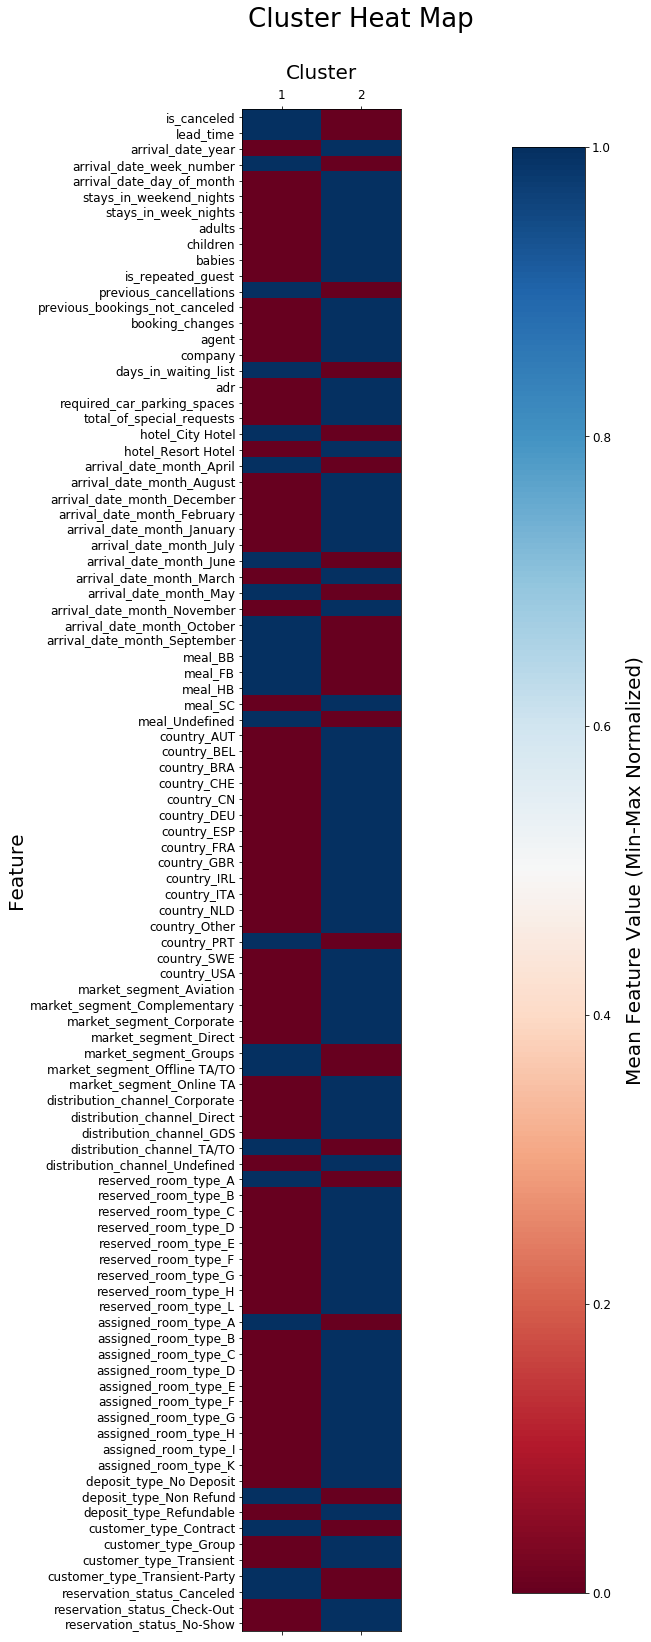

In [254]:
# Import the libraries used to create the heat map
import numpy as np
import matplotlib.pyplot as plt

# Concatenate the cluster labels to the data set fed into the k-means algorithm
with_labels = pandas.concat([clean_data_clu.reset_index().drop('index', axis = 1), 
                             pandas.Series(cluster_labels, name = 'cluster')], axis = 1)

# Group the observations by cluster and aggregate by mean
clusters = with_labels.groupby('cluster').aggregate(np.mean)

# Perform min-max normalization so all values are between 0 and 1
clusters = (clusters - clusters.min()) / (clusters.max() - clusters.min())

# Transpose the DataFrame to create a vertical heat map
clusters = clusters.transpose()

# Create the heat map
fig, ax = plt.subplots(figsize=(40, 28))
img = ax.matshow(clusters, cmap='RdBu', vmin=0, vmax=1, aspect = 0.2)

plt.xticks(range(0,len(clusters.columns),1), range(1,len(clusters.columns) + 1, 1))
plt.yticks(range(0,len(clusters.index),1), clusters.index)
plt.tick_params(labelsize=12)

plt.xlabel('Cluster', fontsize=20, labelpad = 10)
plt.ylabel('Feature', fontsize=20)
plt.title('Cluster Heat Map', fontsize=26)
ax.title.set_position([0.75, 1.05])
ax.xaxis.set_label_position('top')

# Create and format the color bar legend
cb = plt.colorbar(img, shrink = 0.95, orientation = 'vertical')
cb.ax.tick_params(labelsize=12)
cb.ax.set_ylabel("Mean Feature Value (Min-Max Normalized)", fontsize=20, labelpad = 15)

# Display the heat map
plt.show()

The heat map above can be used to analyze the booking details for a typical hotel booking in each of the two clusters. For example, Cluster 1 has a lower mean value for the average daily rate feature, "adr", than Cluster 2, indicating that the bookings in Cluster 1 corresponded to less expensive hotel rooms. In the scenario of a hotel performing customer segmentation to selectively market one of two loyalty programs to its customers, a visualization such as the heat map above could provide valuable insight into how to divide the customers between the two loyalty programs and what the terms and conditions of each loyalty program should be.

### Model Optimization

Optimization of a clustering process is difficult because of the lack of a clear optimization objective, such as the accuracy metric used to evaluate classifiers. However, using the Silhouette Coefficient and cluster visualizations, it is possible to modify the clustering process to produce clusters that provide more insight into the problem being solved. This optimization procedure is similar to the one detailed in the write-up for the regression problem, with optimized feature engineering, feature selection, and preprocessing likely providing the greatest increase in cluster value. Nevertheless, the optimization of a clustering process is inherently more subjective than the optimization of a regression model or classifier and is based largely on the use case for the cluster analysis.